In [69]:
import sklearn
from sklearn import datasets
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# 測試基本功能
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

print(f"scikit-learn version: {sklearn.__version__}")
print(f"seaborn version :{ sns.__version__}")

scikit-learn version: 1.5.1
seaborn version :0.13.2


In [70]:
iris = datasets.load_iris()
print(f"iris:{iris}")


x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names:"+str(iris['target_names']))

y = pd.DataFrame(iris['target'] , columns=['target'])

iris_data = pd.concat([x,y], axis=1)
iris_data.head(3)

iris:{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [71]:
# 把target的0,1,2做一個dict的map到對應的名稱
target_name = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}


In [72]:
# 在資料上加上target_name
iris_data['target_name'] = iris_data['target'].map(target_name)

# 先抓setosa 跟 versicolorr 就好
iris_data = iris_data[(iris_data['target_name'] == 'setosa')| (iris_data['target_name']== 'versicolor')]

# 抓出花萼長度,花瓣長度,跟target name
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target_name']]
iris_data

,sepal length (cm),petal length (cm),target_name
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
95,5.7,4.2,versicolor
96,5.7,4.2,versicolor
97,6.2,4.3,versicolor
98,5.1,3.0,versicolor


In [73]:
# 把target_name的兩種花改成 1,-1 ,方便未來計算
target_class={
    'setosa':1,
    'versicolor':-1
}

In [74]:
iris_data['target_class']= iris_data['target_name'].map(target_class)


In [75]:
del iris_data['target_name']

In [76]:
# 現在資料是我們要用的了
iris_data.head(10)

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
5,5.4,1.7,1
6,4.6,1.4,1
7,5.0,1.5,1
8,4.4,1.4,1
9,4.9,1.5,1


In [77]:
# 設定一個函式 結果>0就是回傳1 
def sign(z):
    if z > 0 :
        return 1
    if z < 0 :
        return -1


### x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]
讓我們將這行程式碼拆解來看，以便於理解。

```python
x, y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]
```

這行程式碼的目標是將一個資料點**轉換為特徵向量 `x`**，並將其**標籤設為 `y`**。

-----

### 1\. 拆解 `x` 的部分

`x` 的值來自於這段程式碼：
`np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2]))`

這段程式碼執行了兩個主要步驟：

1.  **取得資料**：`np.array(iris_data.iloc[i])[:2]`

      * `iris_data.iloc[i]`：這會選取 `iris_data` 資料集的第 `i` 列（也就是第 `i` 筆資料）。
      * `np.array(...)`：將這筆資料轉換成 NumPy 陣列。
      * `[:2]`：取出這個陣列的前兩個元素。這代表模型**只使用** Iris 資料集的前兩個特徵（通常是**花萼長度**和**花萼寬度**）來進行分類。

2.  **加入偏置（Bias）**：`np.concatenate((np.array([1.]), ...))`

      * `np.array([1.])`：建立一個只包含數值 `1.0` 的 NumPy 陣列。
      * `np.concatenate((...), ...)`：這將 `[1.0]` 這個陣列，與前面取出的兩個特徵**拼接**在一起。

所以，`x` 最後會得到一個包含三個元素的陣列，例如：`[1.0, 花萼長度, 花萼寬度]`。

**為什麼要加入 `1.0` 這個值？**

這個 `1.0` 就是感知機模型中的**偏置 (bias) 項**。在感知機的數學表達式 $\\mathbf{w} \\cdot \\mathbf{x} + b$ 中，我們可以將偏置 $b$ 視為一個獨立的參數。

但為了方便程式實作，我們通常會將偏置項併入權重向量中。透過在輸入向量 $\\mathbf{x}$ 的第一個位置加上一個恆定值 `1`，我們就可以將原來的公式改寫為：

$$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1 + w_2 x_2$$

其中 $x\_0=1$，$w\_0$ 就是原本的偏置 $b$。這麼做的好處是，程式碼可以更簡潔，所有參數都包含在一個權重向量 $\\mathbf{w}$ 裡。

-----

### 2\. 拆解 `y` 的部分

`y` 的值來自於這段程式碼：
`np.array(iris_data.iloc[i])[2]`

  * `np.array(iris_data.iloc[i])`：取出第 `i` 筆資料，並轉換為 NumPy 陣列。
  * `[2]`：取出這個陣列的第三個元素（索引為2）。

在 Iris 資料集裡，前兩個特徵是花萼長度和寬度，第三個特徵是**花瓣長度**。所以 `y` 被賦予了**花瓣長度**的值。

### 總結

這行程式碼的目的，是為感知機模型準備一個單一的訓練樣本：

  * **`x`**：一個包含 3 個元素的特徵向量 `[1.0, 花萼長度, 花萼寬度]`。其中 `1.0` 是為了將偏置項整合進去。
  * **`y`**：這個樣本的花瓣長度。

這意味著這段程式碼可能不是在進行**分類**，而是在使用感知機進行**迴歸**，或者 `y` 的值在後續程式碼中被轉換成了類別標籤。但從這單獨一行程式碼來看，它就是在為模型準備一個輸入 `x` 和一個目標輸出 `y`。

x:[1.  5.1 1.4] , y:1.0
iterator: 0
x: [1.  5.1 1.4]
w: [1.  5.1 1.4]


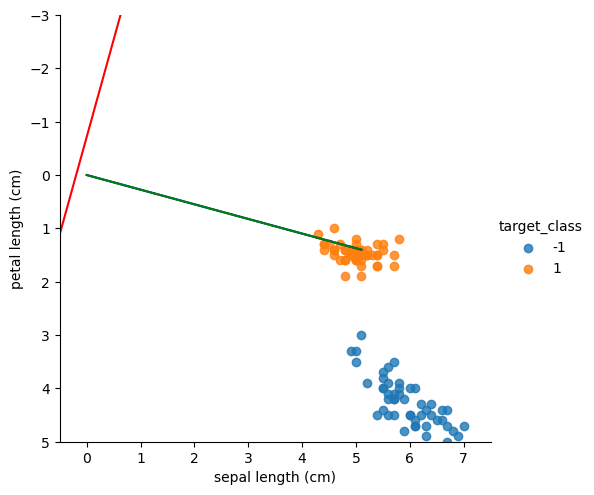

x:[1.  4.9 1.4] , y:1.0
x:[1.  4.7 1.3] , y:1.0
x:[1.  4.6 1.5] , y:1.0
x:[1.  5.  1.4] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  4.6 1.4] , y:1.0
x:[1.  5.  1.5] , y:1.0
x:[1.  4.4 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  4.8 1.4] , y:1.0
x:[1.  4.3 1.1] , y:1.0
x:[1.  5.8 1.2] , y:1.0
x:[1.  5.7 1.5] , y:1.0
x:[1.  5.4 1.3] , y:1.0
x:[1.  5.1 1.4] , y:1.0
x:[1.  5.7 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  4.6 1. ] , y:1.0
x:[1.  5.1 1.7] , y:1.0
x:[1.  4.8 1.9] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.2 1.4] , y:1.0
x:[1.  4.7 1.6] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.5 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.  1.2] , y:1.0
x:[1.  5.5 1.3] , y:1.0
x:[1.  4.9 1.4] , y:1.0
x:[1.  4.4 1.3] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.  1.3] , y:1.0
x:[1.  4.5 1.3] , y:1.0
x:[1.  4.4 1.3] 

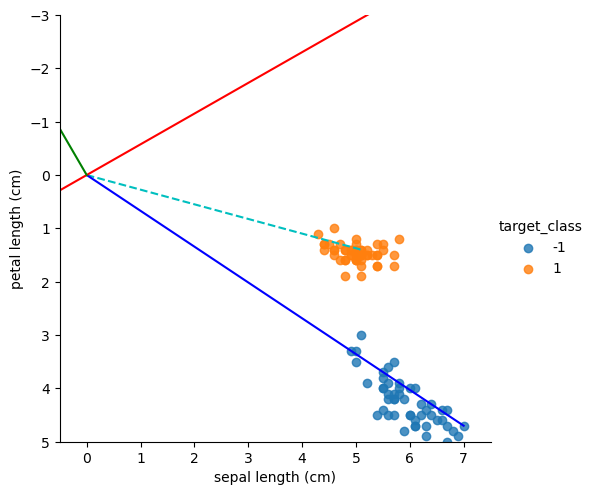

x:[1.  6.4 4.5] , y:-1.0
x:[1.  6.9 4.9] , y:-1.0
x:[1.  5.5 4. ] , y:-1.0
x:[1.  6.5 4.6] , y:-1.0
x:[1.  5.7 4.5] , y:-1.0
x:[1.  6.3 4.7] , y:-1.0
x:[1.  4.9 3.3] , y:-1.0
x:[1.  6.6 4.6] , y:-1.0
x:[1.  5.2 3.9] , y:-1.0
x:[1.  5.  3.5] , y:-1.0
x:[1.  5.9 4.2] , y:-1.0
x:[1. 6. 4.] , y:-1.0
x:[1.  6.1 4.7] , y:-1.0
x:[1.  5.6 3.6] , y:-1.0
x:[1.  6.7 4.4] , y:-1.0
x:[1.  5.6 4.5] , y:-1.0
x:[1.  5.8 4.1] , y:-1.0
x:[1.  6.2 4.5] , y:-1.0
x:[1.  5.6 3.9] , y:-1.0
x:[1.  5.9 4.8] , y:-1.0
x:[1.  6.1 4. ] , y:-1.0
x:[1.  6.3 4.9] , y:-1.0
x:[1.  6.1 4.7] , y:-1.0
x:[1.  6.4 4.3] , y:-1.0
x:[1.  6.6 4.4] , y:-1.0
x:[1.  6.8 4.8] , y:-1.0
x:[1.  6.7 5. ] , y:-1.0
x:[1.  6.  4.5] , y:-1.0
x:[1.  5.7 3.5] , y:-1.0
x:[1.  5.5 3.8] , y:-1.0
x:[1.  5.5 3.7] , y:-1.0
x:[1.  5.8 3.9] , y:-1.0
x:[1.  6.  5.1] , y:-1.0
x:[1.  5.4 4.5] , y:-1.0
x:[1.  6.  4.5] , y:-1.0
x:[1.  6.7 4.7] , y:-1.0
x:[1.  6.3 4.4] , y:-1.0
x:[1.  5.6 4.1] , y:-1.0
x:[1.  5.5 4. ] , y:-1.0
x:[1.  5.5 4.4] , y:-1.0
x:[

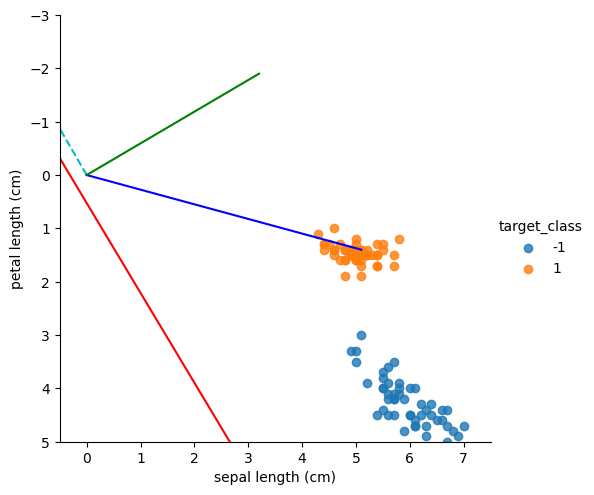

x:[1.  4.9 1.4] , y:1.0
x:[1.  4.7 1.3] , y:1.0
x:[1.  4.6 1.5] , y:1.0
x:[1.  5.  1.4] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  4.6 1.4] , y:1.0
x:[1.  5.  1.5] , y:1.0
x:[1.  4.4 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  4.8 1.4] , y:1.0
x:[1.  4.3 1.1] , y:1.0
x:[1.  5.8 1.2] , y:1.0
x:[1.  5.7 1.5] , y:1.0
x:[1.  5.4 1.3] , y:1.0
x:[1.  5.1 1.4] , y:1.0
x:[1.  5.7 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  4.6 1. ] , y:1.0
x:[1.  5.1 1.7] , y:1.0
x:[1.  4.8 1.9] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.2 1.4] , y:1.0
x:[1.  4.7 1.6] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.5 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.  1.2] , y:1.0
x:[1.  5.5 1.3] , y:1.0
x:[1.  4.9 1.4] , y:1.0
x:[1.  4.4 1.3] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.  1.3] , y:1.0
x:[1.  4.5 1.3] , y:1.0
x:[1.  4.4 1.3] 

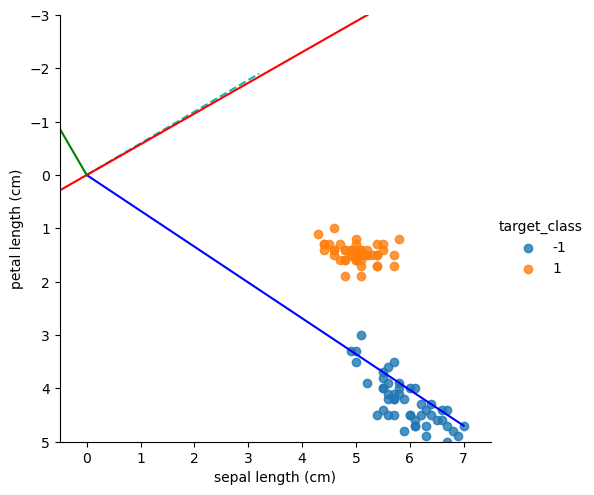

x:[1.  6.4 4.5] , y:-1.0
x:[1.  6.9 4.9] , y:-1.0
x:[1.  5.5 4. ] , y:-1.0
x:[1.  6.5 4.6] , y:-1.0
x:[1.  5.7 4.5] , y:-1.0
x:[1.  6.3 4.7] , y:-1.0
x:[1.  4.9 3.3] , y:-1.0
x:[1.  6.6 4.6] , y:-1.0
x:[1.  5.2 3.9] , y:-1.0
x:[1.  5.  3.5] , y:-1.0
x:[1.  5.9 4.2] , y:-1.0
x:[1. 6. 4.] , y:-1.0
x:[1.  6.1 4.7] , y:-1.0
x:[1.  5.6 3.6] , y:-1.0
x:[1.  6.7 4.4] , y:-1.0
x:[1.  5.6 4.5] , y:-1.0
x:[1.  5.8 4.1] , y:-1.0
x:[1.  6.2 4.5] , y:-1.0
x:[1.  5.6 3.9] , y:-1.0
x:[1.  5.9 4.8] , y:-1.0
x:[1.  6.1 4. ] , y:-1.0
x:[1.  6.3 4.9] , y:-1.0
x:[1.  6.1 4.7] , y:-1.0
x:[1.  6.4 4.3] , y:-1.0
x:[1.  6.6 4.4] , y:-1.0
x:[1.  6.8 4.8] , y:-1.0
x:[1.  6.7 5. ] , y:-1.0
x:[1.  6.  4.5] , y:-1.0
x:[1.  5.7 3.5] , y:-1.0
x:[1.  5.5 3.8] , y:-1.0
x:[1.  5.5 3.7] , y:-1.0
x:[1.  5.8 3.9] , y:-1.0
x:[1.  6.  5.1] , y:-1.0
x:[1.  5.4 4.5] , y:-1.0
x:[1.  6.  4.5] , y:-1.0
x:[1.  6.7 4.7] , y:-1.0
x:[1.  6.3 4.4] , y:-1.0
x:[1.  5.6 4.1] , y:-1.0
x:[1.  5.5 4. ] , y:-1.0
x:[1.  5.5 4.4] , y:-1.0
x:[

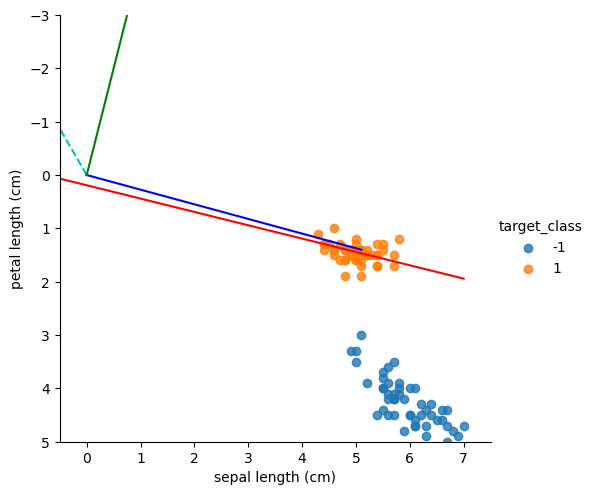

x:[1.  4.9 1.4] , y:1.0
x:[1.  4.7 1.3] , y:1.0
x:[1.  4.6 1.5] , y:1.0
iterator: 5
x: [1.  4.6 1.5]
w: [ 2.   5.9 -3.7]


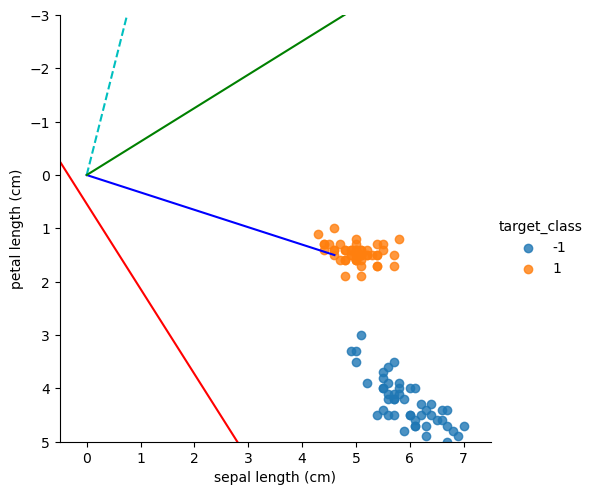

x:[1.  5.  1.4] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  4.6 1.4] , y:1.0
x:[1.  5.  1.5] , y:1.0
x:[1.  4.4 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  4.8 1.4] , y:1.0
x:[1.  4.3 1.1] , y:1.0
x:[1.  5.8 1.2] , y:1.0
x:[1.  5.7 1.5] , y:1.0
x:[1.  5.4 1.3] , y:1.0
x:[1.  5.1 1.4] , y:1.0
x:[1.  5.7 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  4.6 1. ] , y:1.0
x:[1.  5.1 1.7] , y:1.0
x:[1.  4.8 1.9] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.2 1.4] , y:1.0
x:[1.  4.7 1.6] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.5 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.  1.2] , y:1.0
x:[1.  5.5 1.3] , y:1.0
x:[1.  4.9 1.4] , y:1.0
x:[1.  4.4 1.3] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.  1.3] , y:1.0
x:[1.  4.5 1.3] , y:1.0
x:[1.  4.4 1.3] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.1 1.9] , y:1.0
x:[1.  4.8 1.4] 

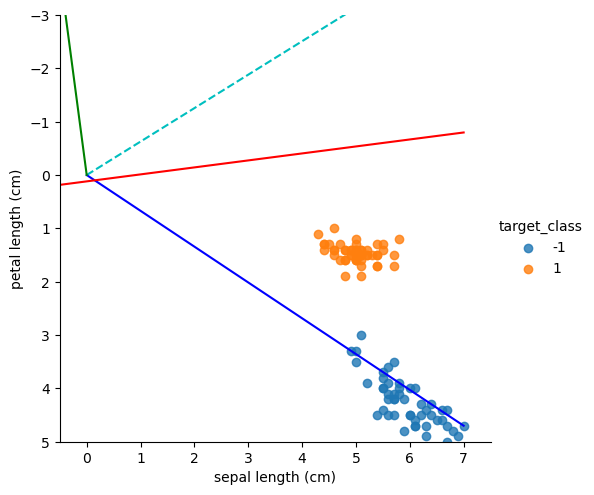

x:[1.  6.4 4.5] , y:-1.0
x:[1.  6.9 4.9] , y:-1.0
x:[1.  5.5 4. ] , y:-1.0
x:[1.  6.5 4.6] , y:-1.0
x:[1.  5.7 4.5] , y:-1.0
x:[1.  6.3 4.7] , y:-1.0
x:[1.  4.9 3.3] , y:-1.0
x:[1.  6.6 4.6] , y:-1.0
x:[1.  5.2 3.9] , y:-1.0
x:[1.  5.  3.5] , y:-1.0
x:[1.  5.9 4.2] , y:-1.0
x:[1. 6. 4.] , y:-1.0
x:[1.  6.1 4.7] , y:-1.0
x:[1.  5.6 3.6] , y:-1.0
x:[1.  6.7 4.4] , y:-1.0
x:[1.  5.6 4.5] , y:-1.0
x:[1.  5.8 4.1] , y:-1.0
x:[1.  6.2 4.5] , y:-1.0
x:[1.  5.6 3.9] , y:-1.0
x:[1.  5.9 4.8] , y:-1.0
x:[1.  6.1 4. ] , y:-1.0
x:[1.  6.3 4.9] , y:-1.0
x:[1.  6.1 4.7] , y:-1.0
x:[1.  6.4 4.3] , y:-1.0
x:[1.  6.6 4.4] , y:-1.0
x:[1.  6.8 4.8] , y:-1.0
x:[1.  6.7 5. ] , y:-1.0
x:[1.  6.  4.5] , y:-1.0
x:[1.  5.7 3.5] , y:-1.0
x:[1.  5.5 3.8] , y:-1.0
x:[1.  5.5 3.7] , y:-1.0
x:[1.  5.8 3.9] , y:-1.0
x:[1.  6.  5.1] , y:-1.0
x:[1.  5.4 4.5] , y:-1.0
x:[1.  6.  4.5] , y:-1.0
x:[1.  6.7 4.7] , y:-1.0
x:[1.  6.3 4.4] , y:-1.0
x:[1.  5.6 4.1] , y:-1.0
x:[1.  5.5 4. ] , y:-1.0
x:[1.  5.5 4.4] , y:-1.0
x:[

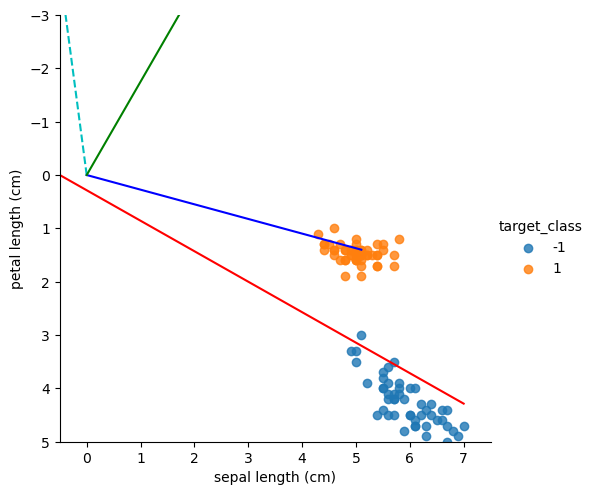

x:[1.  4.9 1.4] , y:1.0
x:[1.  4.7 1.3] , y:1.0
x:[1.  4.6 1.5] , y:1.0
x:[1.  5.  1.4] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  4.6 1.4] , y:1.0
x:[1.  5.  1.5] , y:1.0
x:[1.  4.4 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  4.8 1.4] , y:1.0
x:[1.  4.3 1.1] , y:1.0
x:[1.  5.8 1.2] , y:1.0
x:[1.  5.7 1.5] , y:1.0
x:[1.  5.4 1.3] , y:1.0
x:[1.  5.1 1.4] , y:1.0
x:[1.  5.7 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  4.6 1. ] , y:1.0
x:[1.  5.1 1.7] , y:1.0
x:[1.  4.8 1.9] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.2 1.4] , y:1.0
x:[1.  4.7 1.6] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.5 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.  1.2] , y:1.0
x:[1.  5.5 1.3] , y:1.0
x:[1.  4.9 1.4] , y:1.0
x:[1.  4.4 1.3] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.  1.3] , y:1.0
x:[1.  4.5 1.3] , y:1.0
x:[1.  4.4 1.3] 

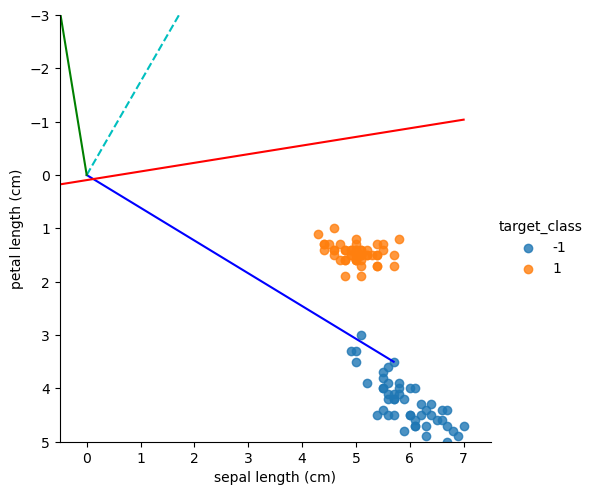

x:[1.  5.5 3.8] , y:-1.0
x:[1.  5.5 3.7] , y:-1.0
x:[1.  5.8 3.9] , y:-1.0
x:[1.  6.  5.1] , y:-1.0
x:[1.  5.4 4.5] , y:-1.0
x:[1.  6.  4.5] , y:-1.0
x:[1.  6.7 4.7] , y:-1.0
x:[1.  6.3 4.4] , y:-1.0
x:[1.  5.6 4.1] , y:-1.0
x:[1.  5.5 4. ] , y:-1.0
x:[1.  5.5 4.4] , y:-1.0
x:[1.  6.1 4.6] , y:-1.0
x:[1.  5.8 4. ] , y:-1.0
x:[1.  5.  3.3] , y:-1.0
x:[1.  5.6 4.2] , y:-1.0
x:[1.  5.7 4.2] , y:-1.0
x:[1.  5.7 4.2] , y:-1.0
x:[1.  6.2 4.3] , y:-1.0
x:[1.  5.1 3. ] , y:-1.0
x:[1.  5.7 4.1] , y:-1.0
x:[1.  5.1 1.4] , y:1.0
iterator: 9
x: [1.  5.1 1.4]
w: [ 2.   3.4 -9.1]


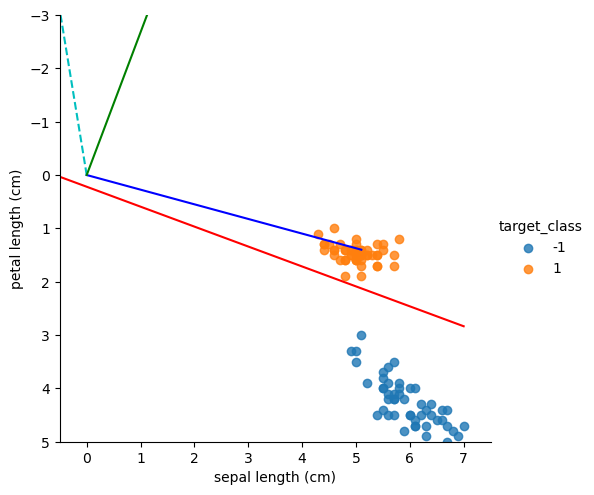

x:[1.  4.9 1.4] , y:1.0
x:[1.  4.7 1.3] , y:1.0
x:[1.  4.6 1.5] , y:1.0
x:[1.  5.  1.4] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  4.6 1.4] , y:1.0
x:[1.  5.  1.5] , y:1.0
x:[1.  4.4 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  4.8 1.4] , y:1.0
x:[1.  4.3 1.1] , y:1.0
x:[1.  5.8 1.2] , y:1.0
x:[1.  5.7 1.5] , y:1.0
x:[1.  5.4 1.3] , y:1.0
x:[1.  5.1 1.4] , y:1.0
x:[1.  5.7 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.4 1.7] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  4.6 1. ] , y:1.0
x:[1.  5.1 1.7] , y:1.0
x:[1.  4.8 1.9] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.  1.6] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.2 1.4] , y:1.0
x:[1.  4.7 1.6] , y:1.0
x:[1.  4.8 1.6] , y:1.0
x:[1.  5.4 1.5] , y:1.0
x:[1.  5.2 1.5] , y:1.0
x:[1.  5.5 1.4] , y:1.0
x:[1.  4.9 1.5] , y:1.0
x:[1.  5.  1.2] , y:1.0
x:[1.  5.5 1.3] , y:1.0
x:[1.  4.9 1.4] , y:1.0
x:[1.  4.4 1.3] , y:1.0
x:[1.  5.1 1.5] , y:1.0
x:[1.  5.  1.3] , y:1.0
x:[1.  4.5 1.3] , y:1.0
x:[1.  4.4 1.3] 

In [82]:

w = np.array([0.,0.,0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]
        if sign(np.dot(w,x)) != y:  #sign(z) -> z = w,x的內積
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            sns.lmplot(x='sepal length (cm)', y='petal length (cm)', data=iris_data, fit_reg=False, hue='target_class')
            
            # 前一個Decision boundary 的法向量
            if w[1] != 0:
                x_last_decision_boundary = np.linspace(0,w[1])
                y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
                plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w))
            # x向量 
            x_vector = np.linspace(0,x[1])
            y_vector = (x[2]/x[1])*x_vector
            plt.plot(x_vector, y_vector,'b')
            # Decision boundary 的方向向量
            x_decision_boundary = np.linspace(-0.5,7)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            # Decision boundary 的法向量
            x_decision_boundary_normal_vector = np.linspace(0,w[1])
            y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
            plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            plt.xlim(-0.5,7.5)
            plt.ylim(5,-3)
            plt.show()